<a href="https://colab.research.google.com/github/RAGISHIVANAND/DEEP_LEARNING/blob/main/1_AIRLINE_PASSENGERS_RNN_LSTM_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
numpy.random.seed(7)
#load the dataset
dataframe = read_csv('/content/drive/MyDrive/Airline passengers.csv', usecols=[1], engine='python')
dataset=dataframe.values
dataset=dataset.astype('float32')

#normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size

train, test = dataset[0:train_size, :],dataset[train_size:len(dataset), :]

#reshape into X= t and Y =t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))





In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0410 - 2s/epoch - 21ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0195 - 145ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0151 - 155ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0139 - 144ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0132 - 157ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0123 - 153ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0113 - 144ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0106 - 163ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0098 - 145ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0089 - 149ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0081 - 143ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0073 - 164ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0065 - 149ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0058 - 138ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0051 - 145ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0045 - 150ms/epoc

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculate root mean squared error

#trainscore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train score: %.2f RMSE' %(trainscore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test score: %.2f RMSE' %(testScore))

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train score: %.2f RMSE' % trainscore)
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Test score: %.2f RMSE' % testScore)

Train score: 22576821000872695957118713180450231156736.00 RMSE
Test score: 157744909174098691211506045633429504.00 RMSE


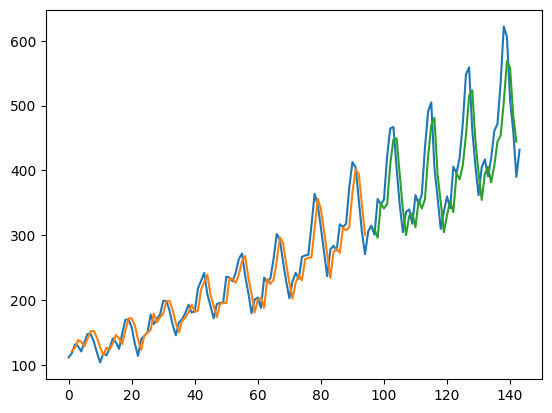

In [ ]:
### Plotting
# shift train predictions for plotting
lookback=4
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()